In [1]:
import numpy as np
import scipy as sp
from scipy import special
from scipy.interpolate import CubicSpline
import astropy
from astropy.cosmology import FlatLambdaCDM
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex = True)
from numpy import save

In [2]:
k = np.load('../Axion-main/k_omegac_fdc.npy')[:,:,:,::-1]
pk = np.load('../Axion-main/pk_omegac_fdc.npy')[:,:,:,::-1]

In [3]:
print(np.shape(k))
print(np.shape(pk))

(1, 25, 301, 657)
(1, 25, 301, 657)


In [4]:
fv = [0.02233,0.1198,0.0001,10**-27,67.37,0.9652]
#parameter confidence intervals as given in table 3 of Planck 2015 (arxiv 1502.01589)
ci = [0.00016,0.0015,'n/a','n/a',0.66,0.0049]
#number of axioncamb runs for each parameter
runs = 25
#run values for omega_baryon
omegab = np.round(np.linspace(fv[0]-10*ci[0],fv[0]+10*ci[0],runs),5)
#run values for omega_cdm
omegac = np.round(np.linspace(fv[1]-10*ci[1],fv[1]+10*ci[1],runs),4)
#run values for omega_cdm and omega_axion used to run the desired axion fractions
fa = np.linspace(0.0001,0.025,runs)
omegaax = fv[1]*fa
omegac2 = fv[1]-omegaax
fa_zip = zip(omegac2,omegaax)
#run values for hubble constant
h0 = np.round(np.linspace(fv[4]-ci[4],fv[4]+ci[4],runs),2)
#run values for scalar tilt
ns = np.round(np.linspace(fv[5]-ci[5],fv[5]+ci[5],runs),4)
#run values for axion mass
ma = np.logspace(-29,-22,11)
params = []
params.append(omegab)
params.append(omegac)
params.append(fa)
params.append(ns)
params.append(h0)

In [5]:
for i in range(5):
    print(params[i])

[0.02073 0.02086 0.021   0.02113 0.02126 0.0214  0.02153 0.02166 0.0218
 0.02193 0.02206 0.0222  0.02233 0.02246 0.0226  0.02273 0.02286 0.023
 0.02313 0.02326 0.0234  0.02353 0.02366 0.0238  0.02393]
[0.1048 0.106  0.1073 0.1086 0.1098 0.111  0.1123 0.1136 0.1148 0.116
 0.1173 0.1186 0.1198 0.121  0.1223 0.1236 0.1248 0.126  0.1273 0.1286
 0.1298 0.131  0.1323 0.1336 0.1348]
[0.0001    0.0011375 0.002175  0.0032125 0.00425   0.0052875 0.006325
 0.0073625 0.0084    0.0094375 0.010475  0.0115125 0.01255   0.0135875
 0.014625  0.0156625 0.0167    0.0177375 0.018775  0.0198125 0.02085
 0.0218875 0.022925  0.0239625 0.025    ]
[0.9603 0.9607 0.9611 0.9615 0.9619 0.9623 0.9628 0.9632 0.9636 0.964
 0.9644 0.9648 0.9652 0.9656 0.966  0.9664 0.9668 0.9672 0.9676 0.9681
 0.9685 0.9689 0.9693 0.9697 0.9701]
[66.71 66.77 66.82 66.88 66.93 66.99 67.04 67.1  67.15 67.21 67.26 67.32
 67.37 67.43 67.48 67.54 67.59 67.65 67.7  67.76 67.81 67.87 67.92 67.97
 68.03]


In [6]:
kval = np.load('../Axion-main/kval.npy')
# print(type(kval))
# print(kval)

In [7]:
print(kval[448])

1.0097


In [8]:
print(kval[183])
print(kval[332])

0.00504
0.099227


In [9]:
pk_new = np.zeros((1,301,657,25))

for j in range(25):
    pk_new[:,:,:,j] = pk[:,j,:,:]

print(np.shape(pk_new))

(1, 301, 657, 25)


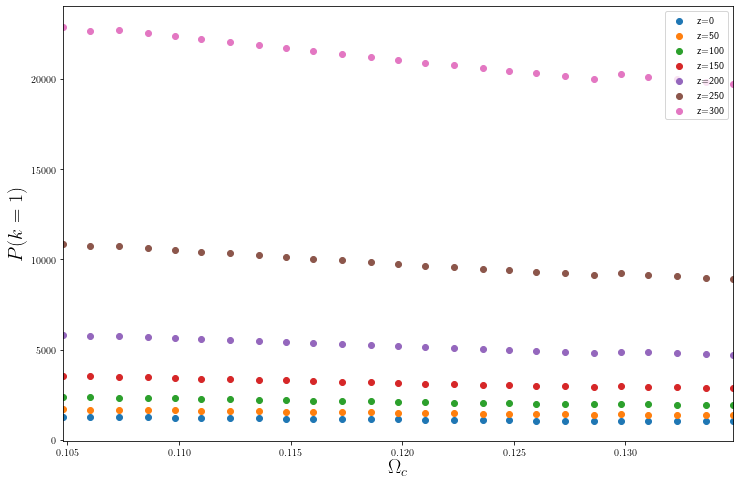

In [10]:
plt.figure(figsize=(12,8))
for i in range(7):
    j = 50*i
    plt.scatter(params[1],pk_new[0][j][448],label='z=%s'%(j))
plt.xlabel('$\Omega_c$',size=20)
plt.ylabel('$P(k=1)$',size=20)
plt.xlim(params[1][0],params[1][24])
plt.legend()
# plt.savefig('Omega_b')

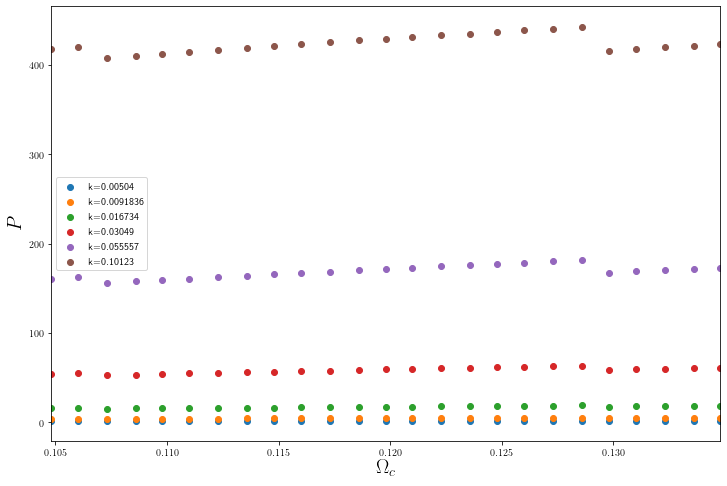

In [11]:
plt.figure(figsize=(12,8))
for i in range(6):
    j = i*30+183
    plt.scatter(params[1],pk_new[0][0][j],label='k=%s'%(kval[j]))
plt.xlabel('$\Omega_c$',size=20)
plt.ylabel('$P$',size=20)
plt.xlim(params[1][0],params[1][24])
plt.legend()
# plt.savefig('omegab_ks')

Text(0, 0.5, '$P(k=1)$')

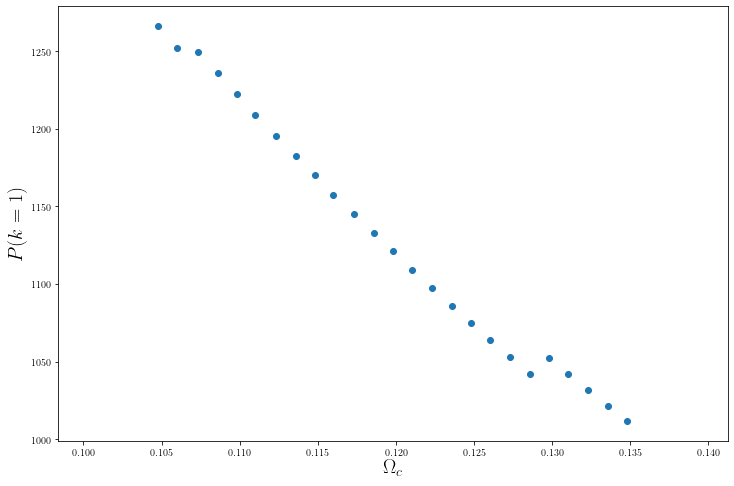

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(params[1],pk_new[0][0][448])
plt.xlabel('$\Omega_c$',size=20)
plt.ylabel('$P(k=1)$',size=20)
# plt.savefig('Omega_b_z0')

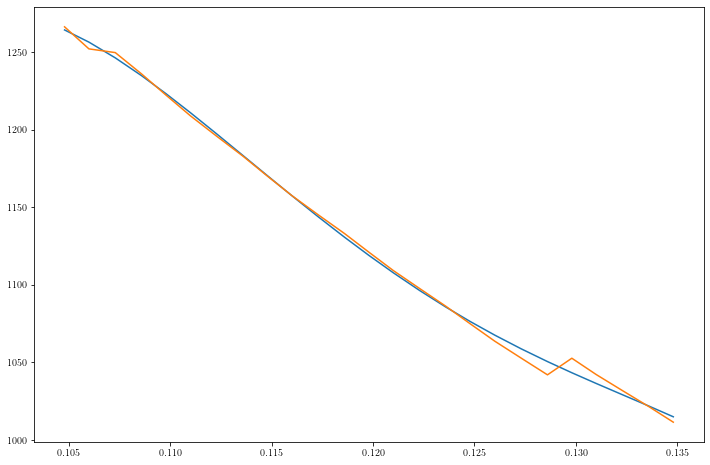

In [13]:
plt.figure(figsize=(12,8))
plt.plot(params[1],np.poly1d(np.polyfit(params[1],pk_new[0][0][448],4))(params[1]))
plt.plot(params[1],pk_new[0][0][448])

In [14]:
Chi2 = []
for p in range(1):
    c1 = []
    for z in range(301):
        c2 = []
        for i in range(657):
            fit = np.poly1d(np.polyfit(params[1],pk_new[p][z][i],4))(params[1])
            avg = sum(fit)/len(fit)
            chi2 = sum((fit-pk_new[p][z][i])**2)/sum((fit-avg)**2)
            c2.append(chi2)
        c1.append(c2)
    Chi2.append(c1)
                
                
print(np.shape(Chi2))

(1, 301, 657)


Text(0, 0.5, '$\\chi^2$')

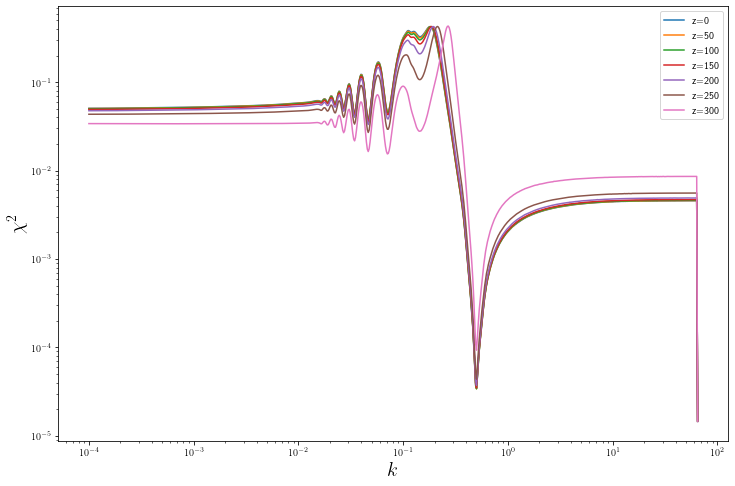

In [15]:
plt.figure(figsize=(12,8))
for i in range(7):
    j = i*50
    plt.loglog(kval,Chi2[0][j],label='z=%s'%(j))
plt.legend()
plt.xlabel('$k$',size=20)
plt.ylabel('$\chi^2$',size=20)
# plt.savefig('Chi2_omegab')

Text(0, 0.5, '$\\chi^2$')

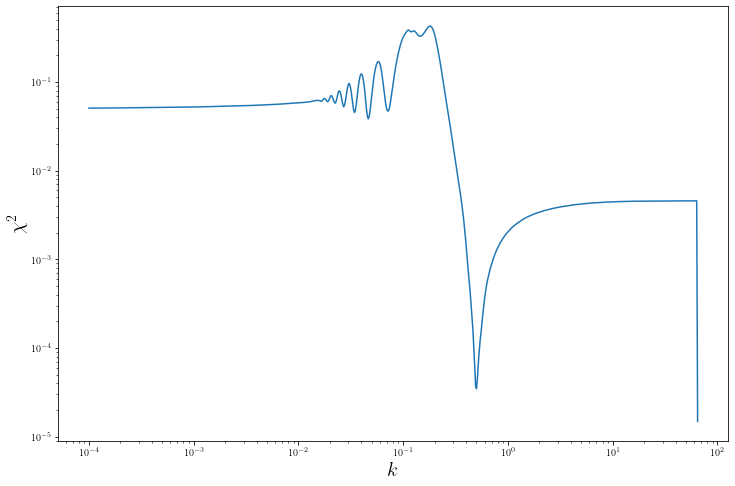

In [16]:
plt.figure(figsize=(12,8))
plt.loglog(kval,Chi2[0][0])
plt.xlabel('$k$',size=20)
plt.ylabel('$\chi^2$',size=20)
# plt.savefig('Chi2_omegab_z0')

In [17]:
# print(np.polyfit(params[0],pk_new[0][0][448],4))
# print(np.poly1d(np.polyfit(params[0],pk_new[0][0][448],4)))
# print(np.poly1d(np.polyfit(params[0],pk_new[0][0][448],4))(params[0]))
# print(np.poly1d(np.polyder(np.polyfit(params[0],pk_new[0][0][448],4))))
# print(np.poly1d(np.polyder(np.polyfit(params[0],pk_new[0][0][448],4)))(params[0]))

In [18]:
k = np.load('../Axion-main/k_omegac_fdc.npy')[:,:,:,::-1]
pk = np.load('../Axion-main/pk_omegac_fdc.npy')[:,:,:,::-1]

In [19]:
pk_dimless = (np.power(k,3)*pk)/(2*(np.pi**2))
print(np.shape(pk_dimless))

(1, 25, 301, 657)


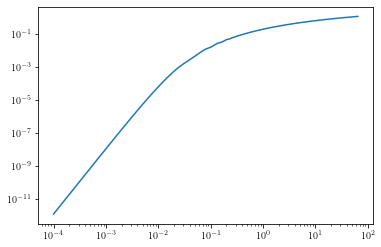

In [20]:
plt.loglog(k[0][12][0],pk_dimless[0][12][0])

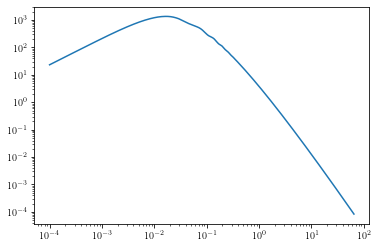

In [21]:
plt.loglog(k[0][12][0],pk[0][12][0])

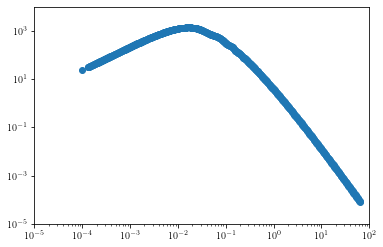

In [22]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-5,1e2)
plt.ylim(1e-5,1e4)
plt.scatter(k[0][12][0],pk[0][12][0])
plt.show()

In [23]:
print(np.poly1d(np.polyfit(np.log(k[0][12][0]),np.log(pk[0][12][0]),4)))
# print(np.poly1d(np.polyfit(np.log(k[0][12][0]),np.log(pk[0][12][0]),4))*(np.log(k[0][12][0])))
print(np.shape(np.poly1d(np.polyfit(np.log(k[0][12][0]),np.log(pk[0][12][0]),4))*(np.log(k[0][12][0]))))

          4           3          2
0.002251 x + 0.02696 x - 0.1826 x - 2.383 x + 1.494
(661,)


In [24]:
logx = np.log(k[0][12][0])
logy = np.log(pk[0][12][0])
print(np.poly1d(np.polyfit(logx,logy,4)))
print(np.poly1d(np.polyfit(logx,logy,4))(logx))

          4           3          2
0.002251 x + 0.02696 x - 0.1826 x - 2.383 x + 1.494
[-8.98074209 -8.94365631 -8.90628125 -8.86857511 -8.8305864  -8.79227002
 -8.75367634 -8.71479142 -8.67559898 -8.63611693 -8.59636455 -8.55636257
 -8.51605376 -8.47545548 -8.43458644 -8.39346675 -8.35207382 -8.31042724
 -8.26850147 -8.22631536 -8.18388916 -8.1412446  -8.09830158 -8.05512989
 -8.01169734 -7.96807923 -7.92418639 -7.88003692 -7.8356503  -7.79110909
 -7.74625055 -7.70121877 -7.65597263 -7.61053413 -7.56485693 -7.51896088
 -7.47286727 -7.42652363 -7.3800257  -7.33332028 -7.28642892 -7.23929184
 -7.1920124  -7.14452971 -7.09686513 -7.04895032 -7.00098969 -6.95272896
 -6.90437766 -6.8557643  -6.80700783 -6.75813312 -6.70905917 -6.65980646
 -6.61050946 -6.56096898 -6.51120192 -6.46134709 -6.41130885 -6.36123444
 -6.31089647 -6.26044214 -6.20989671 -6.15928698 -6.10835837 -6.05741109
 -6.00632857 -5.95513398 -5.90369714 -5.85219201 -5.80064611 -5.74892304
 -5.69721171 -5.64519845 -5.59324798 

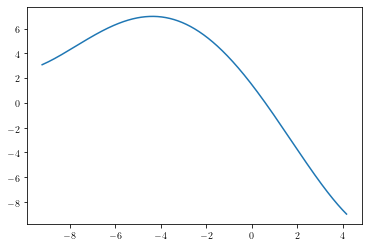

In [25]:
plt.plot(logx,np.poly1d(np.polyfit(logx,logy,4))(logx))

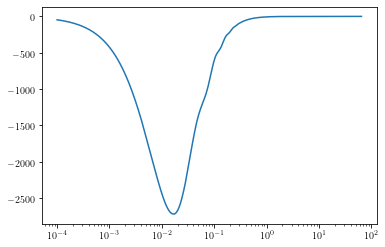

In [26]:
plt.plot(k[0][12][0],np.poly1d(np.polyder(np.polyfit(k[0][12][0],logy,4)))(k[0][12][0])*pk[0][12][0])
plt.xscale('log')

In [2]:
pk_diff = np.load('../Axion-main/diffder_omegac.npy')
print(np.shape(pk_diff))

(25, 8, 1, 552)


In [3]:
kval_diff = np.load('../Axion-main/kval_diff_omegac.npy')
print(np.shape(kval_diff))

(552,)


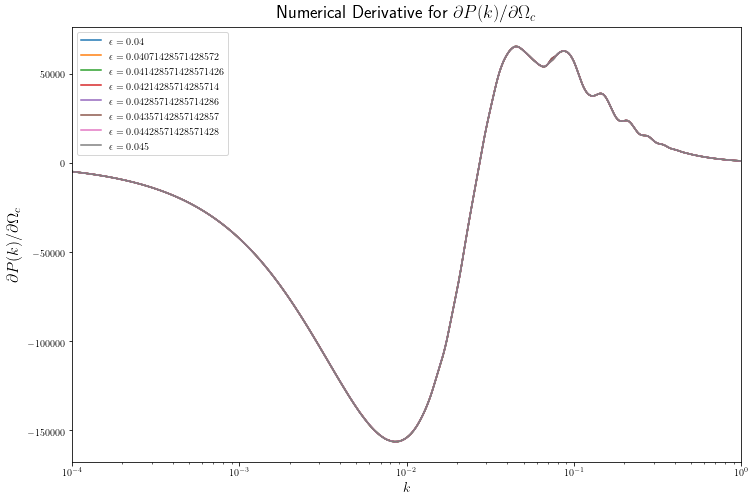

In [5]:
plt.figure(figsize=(12,8))
step = np.linspace(0.04,0.045,8)
# plt.plot(k_trim[0][12][0],derivative, label='from polynomial fit')
for i in range(8):
    plt.plot(kval_diff, pk_diff[12][i][0],label=r'$\epsilon=%s$'%(step[i]))
    plt.xscale('log')
    plt.xlim(1e-4,1)
    plt.xlabel('$k$',fontsize=14)
    plt.ylabel('$\partial P(k)/\partial \Omega_c$',fontsize=16)
    plt.title('Numerical Derivative for $\partial P(k)/\partial \Omega_c$',fontsize=18)
    plt.legend()
    
    
plt.savefig('numder_omegac.pdf',bbox_inches='tight')


In [40]:
k_trim = np.zeros((1,25,301,552))
pk_trim = np.zeros((1,25,301,552))
dump1 = np.zeros((1,25,301,552))
dump2 = np.zeros((1,25,301,552))
for l in range(1):
    for i in range(runs):
        for y in range(301):
            c = 0
            for j in range(657):
                if j <= 26:
                    k_trim[l][i][y][j] = k[l][i][y][j]
                    pk_trim[l][i][y][j] = pk[l][i][y][j]
                    c = c+1
#                 if j>38 and j%5 == 3:
#                     dump1[l][i][y][j] = k[l][i][y][j]
#                     dump2[l][i][y][j] = pk[l][i][y][j]
                elif j>26 and j%6 != 2:
                    k_trim[l][i][y][c] = k[l][i][y][j]
                    pk_trim[l][i][y][c] = pk[l][i][y][j]
                    c = c+1

print(np.shape(k_trim))                    
print(np.shape(pk_trim))
print(c)

(1, 25, 301, 552)
(1, 25, 301, 552)
552


(552,)


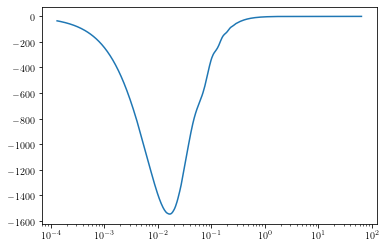

In [41]:
derivative = np.poly1d(np.polyder(np.polyfit(k_trim[0][12][0],np.log10(pk_trim[0][12][0]),5)))(k_trim[0][12][0])*pk_trim[0][12][0]
plt.plot(k_trim[0][12][0],derivative)
plt.xscale('log')
print(np.shape(derivative))

In [42]:
Chisq = []
for i in range(8):
    avg=sum(pk_diff[12][i][0])/len(pk_diff[12][i][0])
    Chisq.append((sum((pk_diff[12][i][0]-derivative)**2))/sum((pk_diff[12][i][0]-avg)**2))

In [43]:
print(np.shape(Chisq))

(8,)


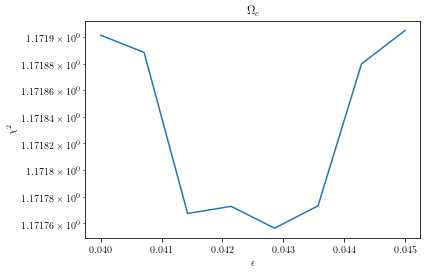

In [46]:
plt.plot(step, Chisq)
plt.yscale('log')
plt.title('$\Omega_c$')
plt.xlabel('$\epsilon$')
plt.ylabel('$\chi^2$')
plt.savefig('omegac_diff_chi2')

In [48]:
mergek = np.load('../Axion-main/omegac_mergek2.npy')
mergepk = np.load('../Axion-main/omegac_mergepk2.npy')

print(np.shape(mergek))
print(np.shape(mergepk))

(25, 16, 1, 552)
(25, 16, 1, 552)


In [50]:
mergek_reshape = np.reshape(mergek,(16,1,552,25))
mergepk_reshape = np.reshape(mergepk,(16,1,552,25))

mergek_reshape2 = np.zeros((16,1,552,25))
mergepk_reshape2 = np.zeros((16,1,552,25))

for i in range(25):
    mergek_reshape2[:,:,:,i] = mergek[i,:,:,:]
    mergepk_reshape2[:,:,:,i] = mergepk[i,:,:,:]
    
print(mergek_reshape2[0][0][0])
print(mergepk_reshape2[0][0][0])

[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001]
[534.71 528.57 522.55 516.64 510.83 505.13 499.54 494.04 488.64 483.33
 478.12 473.   467.96 463.02 458.15 453.37 448.67 444.05 439.5  435.03
 430.63 426.3  422.04 417.85 413.73]


In [52]:
derivative = []
for i in range(552):
    der = np.poly1d(np.polyder(np.polyfit(omegac,mergepk_reshape2[0][0][i],4)))(omegac)
    derivative.append(der)

print(np.shape(derivative))

derivative_reshape2 = np.zeros((25,552))
for i in range(552):
    for j in range(25):
        derivative_reshape2[j][i] = derivative[i][j]

print(np.shape(derivative_reshape2))

(552, 25)
(25, 552)


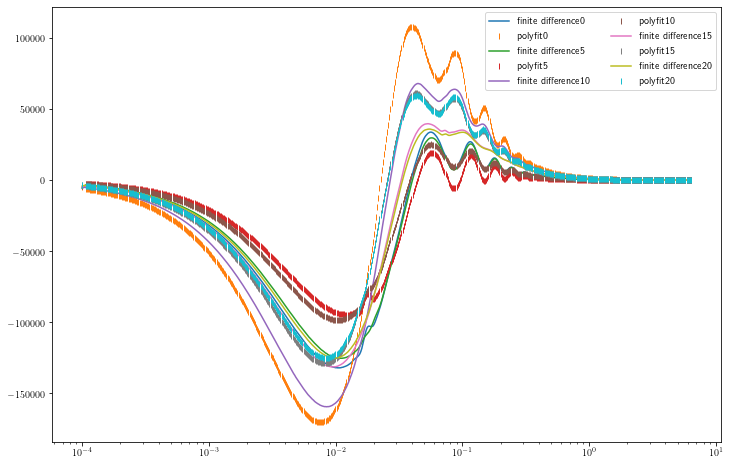

In [55]:
plt.figure(figsize=(12,8))
for i in range(5):
    j = i*5
    plt.plot(kval_diff,pk_diff[j][0][0],label='finite difference%s'%(j))
    plt.plot(kval_diff,derivative_reshape2[j],'|',label='polyfit%s'%(j))
    plt.xscale('log')
    plt.legend(ncol=2)

plt.savefig('omegacderivative')

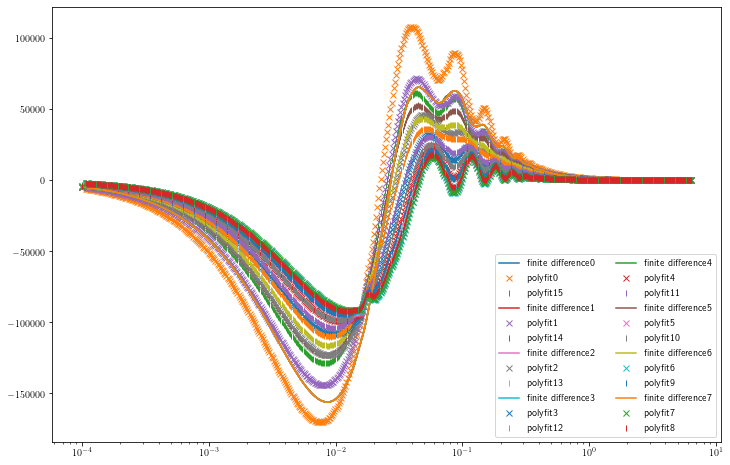

In [59]:
plt.figure(figsize=(12,8))
for i in range(8):
    plt.plot(kval_diff,pk_diff[12][i][0],label='finite difference%s'%(i))
    plt.plot(kval_diff,derivative_reshape2[i],'x',label='polyfit%s'%(i))
    plt.plot(kval_diff,derivative_reshape2[15-i],'|',label='polyfit%s'%(15-i))
    plt.xscale('log')
    plt.legend(ncol=2)

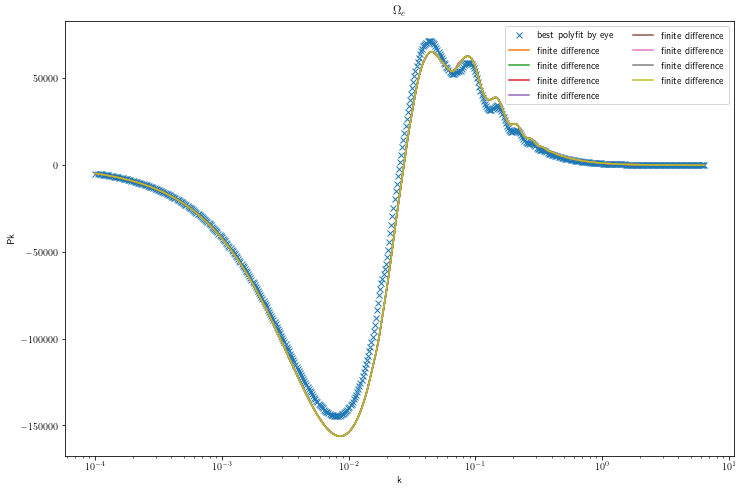

In [61]:
plt.figure(figsize=(12,8))
plt.plot(kval_diff,derivative_reshape2[1],'x',label='best polyfit by eye')
for i in range(8):
    plt.plot(kval_diff,pk_diff[12][i][0],label='finite difference')
#     plt.plot(kval_diff,derivative_reshape2[15-i],'|',label='polyfit%s'%(15-i))
    plt.xscale('log')
    plt.legend(ncol=2)
    
plt.xlabel('k')    
plt.ylabel('Pk')
plt.title('$\Omega_c$')
plt.savefig('omegacbestder')